<h1 style=text-align:center> TP3 - Traitement du signal </h1>

<h2> BARRAIS Thomas <br> D'HESPEL Audoin </h2>

<h2 style=text-align:center> L'objectif de ce TP est d'appliquer une modulation d'amplitude avec porteuse sur un signal puis de comparer les modulation synchrone et asynchrone </h2>

<h3> Exercice 1 : Question 1) </h3>

<h4> Partie Analytique </h4>

Soit un signal $x(t) = cos(2\pi f_1 t)$ auquel on applique une modulation d'amplitude avec porteuse.

Pour déterminer la transformée de Fourier de la fonction $\cos(2\pi f_1 t)$, nous utiliserons la définition de la transformée de Fourier :

$$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-2i\pi ft} dt$$

où $F(\omega)$ est la transformée de Fourier de $f(t)$.

Dans notre cas, nous avons $x(t) = \cos(2\pi f_1 t)$, avec $f_1 = 1KHz$. Donc, la transformée de Fourier $\hat{x}(f)$ de $x(t)$ est donnée par :

$$\hat{x}(f) = \int_{-\infty}^{\infty} \cos(2\pi f_1 t) e^{-2i\pi ft} dt$$

Appliquons maintenant la formule d'Euler pour représenter la fonction cosinus en termes de fonctions exponentielles :

$$ \cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}$$

On utilise cette formule pour exprimer $\cos(2\pi f_1 t)$ et on substitue cette expression dans la formule de la transformée de Fourier :

$$ \hat{x}(f) = \frac{1}{2} \left( \int_{-\infty}^{\infty} e^{2i\pi(f_1 - f) t} + \int_{-\infty}^{\infty} e^{-2i\pi( f_1 + f) t} \right) dt $$

En simplifiant l'expression, on obtient :

$$\boxed{\hat{x}(f) = \frac{1}{2} \left[ \delta(f_1 - f) + \delta(f_1 + f) \right]}$$

où $\delta(x)$ est la fonction delta de Dirac.

En résumé, la transformée de Fourier de $\cos(2\pi f_1 t)$ est donnée par $\frac{1}{2} \left[ \delta(f_1 - f) + \delta(f_1 + f \right)]$.

<!-- <div style="text-align:center"><img src="fourier-transform.jpg" alt="image fourier"></div> -->

<h4> Partie Python </h4>

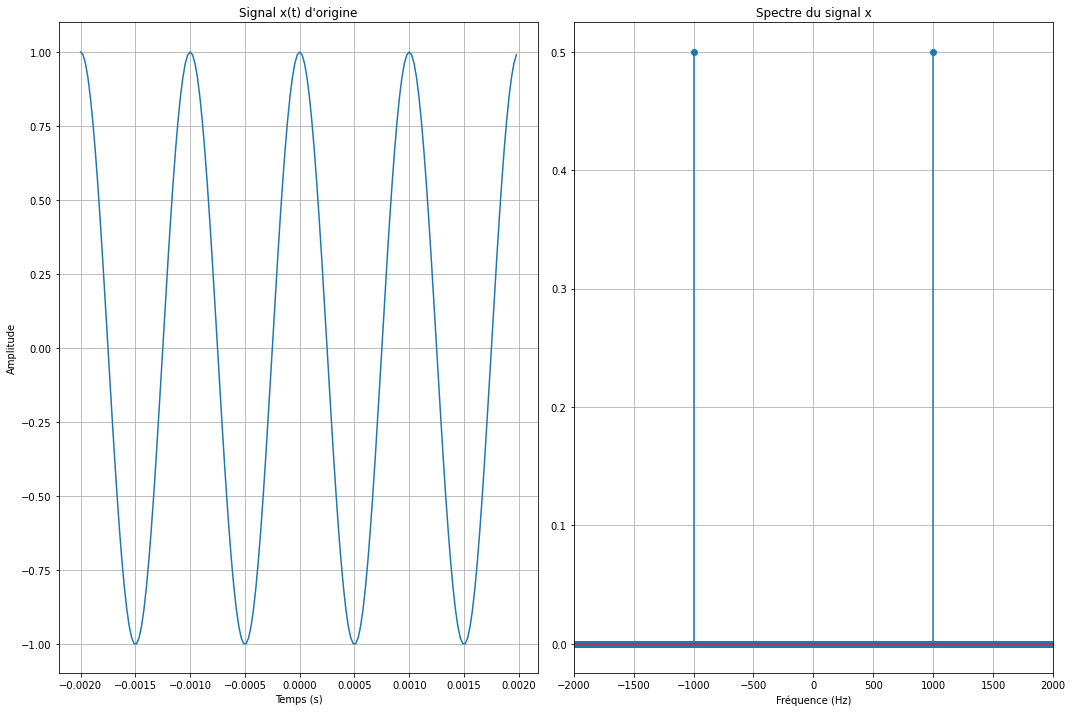

In [195]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 1000 #Hz
f0 = 1000000 #Hz

T = 1 #s
Fe = 45000 #Hz
te = 1/Fe #s
N = Fe*T #nombre de points

T2 = 0.002 #s
te2 = 1 / Fe #s

t = np.arange(0, T, te) #pour appliquer la FFT
t2 = np.arange(-T2, T2, te2) #pour afficher le signal

x = np.cos(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f1*t2)

X = np.fft.fft(x)/N
f = np.fft.fftfreq(N, te)

figure, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].set_title("Signal x(t) d'origine")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlabel("Temps (s)")
axs[0].plot(t2,x2)
axs[0].grid()

axs[1].set_title("Spectre du signal x")
axs[1].stem(f, np.abs(X))
axs[1].set_xlabel("Fréquence (Hz)")
axs[1].set_xlim(-2000, 2000)
axs[1].grid()

plt.tight_layout()
plt.show()

<h4> Analyse </h4>

On obtient un spectre cohérent avec le calcul analytique puisqu'il y a deux pics de Dirac décalés aux fréquences $f_1 = 1 \, \text{K}Hz$ et $-f_1$.

<h3> Exercice 1 : Question 2) </h3>

<h4> Partie Analytique </h4>

Le signal $e(t)$ est défini comme suit :

$e(t) = (\cos(2\pi f_1 t) + k) \cos(2\pi f_0 t)$

En utilisant la formule d'Euler pour représenter les fonctions cosinus en termes de fonctions exponentielles, nous avons :

$\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}$

Appliquons cette formule à notre fonction $e(t)$ :

$$e(t) = \left(\frac{e^{2i\pi f_1 t} + e^{-2i\pi f_1 t}}{2} + k\right) \frac{e^{2i\pi f_0 t} + e^{-2i\pi f_0 t}}{2}$$

La transformée de Fourier de $e(t)$, notée $E(\omega)$, est calculée en utilisant la définition de la transformée de Fourier :

$E(\omega) = \int_{-\infty}^{\infty} e(t) \cdot e^{-i\omega t} \, dt$

Substituons maintenant l'expression de $e(t)$ dans la formule de la transformée de Fourier :

$E(\omega) = \int_{-\infty}^{\infty} \left(\frac{e^{i2\pi f_1 t} + e^{-i2\pi f_1 t}}{2} + k\right) \frac{e^{2i\pi f_0 t} + e^{-2i\pi f_0 t}}{2} \cdot e^{-i\omega t} \, dt$

Simplifions l'expression en regroupant les termes exponentiels :

$$\boxed{E(\omega) = \int_{-\infty}^{\infty} \left(\frac{e^{i[2\pi (f_1+f_0) - \omega] t} + e^{-i[2\pi (f_1+f_0) + \omega] t} + e^{i[2\pi (f_1-f_0) - \omega] t} + e^{-i[2\pi (f_1-f_0) + \omega] t}}{4} + k \cdot \frac{e^{i[2\pi f_0 - \omega] t} + e^{-i[2\pi f_0 + \omega] t}}{2}\right) \, dt}$$

Nous pouvons effectuer l'intégration en tenant compte des valeurs $f_1 = 1 \, \text{K}Hz$, $f_0 = 1 \, \text{M}Hz$ et $k = 2$ et nous obtiendrons des Dirac décalés aux fréquences comme dans la question 1.

<div style="text-align:center"><img src="AM_freq.gif" alt="spectre modulation AM"></div>

<h4> Partie Python </h4>

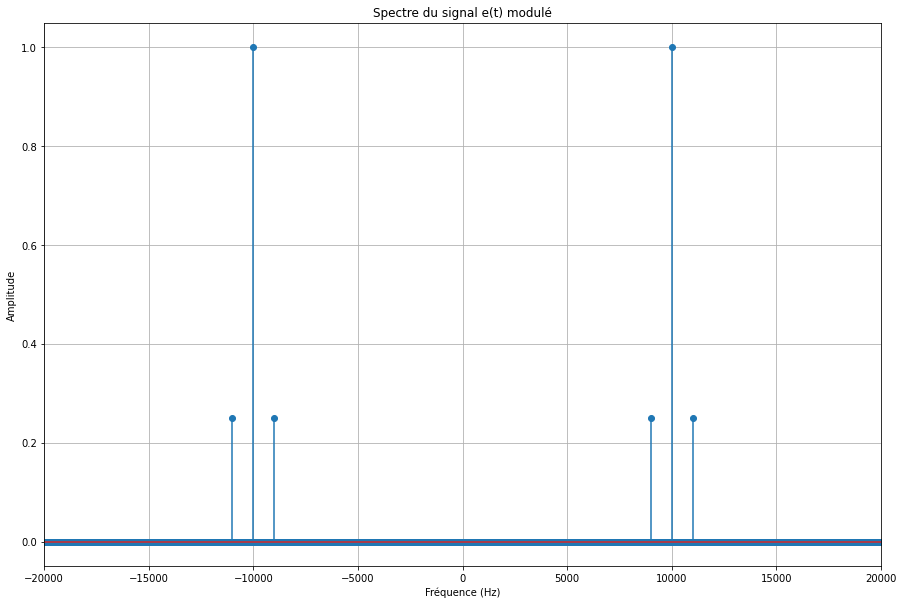

In [196]:
k = 2 
x1 = x + k
e = x1 * np.cos(2*np.pi*f0*t)

E = np.fft.fft(e)/N

plt.figure(figsize=(15, 10))
plt.title("Spectre du signal e(t) modulé")
plt.stem(f, np.abs(E))
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Hz)")
plt.xlim(-20000, 20000)
plt.grid()
plt.show()

<h4> Analyse </h4>

<b> Le spectre est bien composé de 6 pics : 4 pics d'amplitude 0.25 et deux pics d'amplitude 1 car nous avons fixé k à 2. Les pics sont bien disposés selon les fréquences de nos fonction exponentielle dans le calcul de l'intégrale. </b>

<h3> Exercice 2 : Question 1) </h3>

<h4> Partie Analytique </h4>

<b> On définit $y1(t)$ tel que : $y1(t) = e(t) \cdot \cos(2\pi f_0 t) $ 

<b> Calcul analytique de la transformée de fourier de y1 : </b>

Le signal $y_1(t)$ est défini tel que :

$$y_1(t) = e(t) \cdot \cos(2\pi f_0 t)$$

Substituons l'expression de $e(t)$ dans $y_1(t)$ :

$y_1(t) = \left[\left(\cos(2\pi f_1 t) + k\right) \cos(2\pi f_0 t)\right] \cos(2\pi f_0 t)$

Simplifions l'expression en utilisant l'identité trigonométrique $\cos^2(x) = \frac{1 + \cos(2x)}{2}$ :

$$y_1(t) = \frac{\left(\cos(2\pi f_1 t) + k\right) \cdot \left(1 + \cos(4\pi f_0 t)\right)}{2}$$

Maintenant, pour calculer la transformée de Fourier de $y_1(t)$, notée $Y_1(\omega)$, nous utilisons la définition de la transformée de Fourier :

$Y_1(\omega) = \int_{-\infty}^{\infty} y_1(t) \cdot e^{-i\omega t} \, dt$

Substituons l'expression de $y_1(t)$ :

$$Y_1(\omega) = \int_{-\infty}^{\infty} \frac{\left(\cos(2\pi f_1 t) + k\right) \cdot \left(1 + \cos(4\pi f_0 t)\right)}{2} \cdot e^{-i\omega t} \, dt$$

Nous pouvons maintenant effectuer l'intégration pour calculer la transformée de Fourier de $y_1(t)$.

<b>De la même manière que précédemment, en utilisant les formules de Taylor, on obtient ainsi 9 pics de Dirac :</b>

$$Y_1(\omega) = \frac{1}{2} \int_{-\infty}^{\infty} \left(\frac{e^{2i\pi f_1 t} + e^{-2i\pi f_1 t}}{2} + k\right) \cdot \left(1 + \frac{e^{4i\pi f_0 t} + e^{-4i\pi f_0 t}}{2} \right) \cdot e^{-i\omega t} \, dt$$

On obtient donc : 

$$\boxed{Y_1(\omega) = \frac{1}{2} \int_{-\infty}^{\infty} \left(\frac{e^{2i\pi f_1 t} + e^{-2i\pi f_1 t}}{2} + \frac{e^{2i\pi (f_1+2f_0) t} + e^{-2i\pi (f_1+2f_0) t} + e^{2i\pi (f_1-2f_0) t} + e^{-2i\pi (f_1-2f_0) t}}{4} + k\cdot\frac{e^{4i\pi f_0 t} + e^{-4i\pi f_0 t}}{2} + k \right) \cdot e^{-i\omega t} \, dt}$$

<h3> Partie Python </h3>

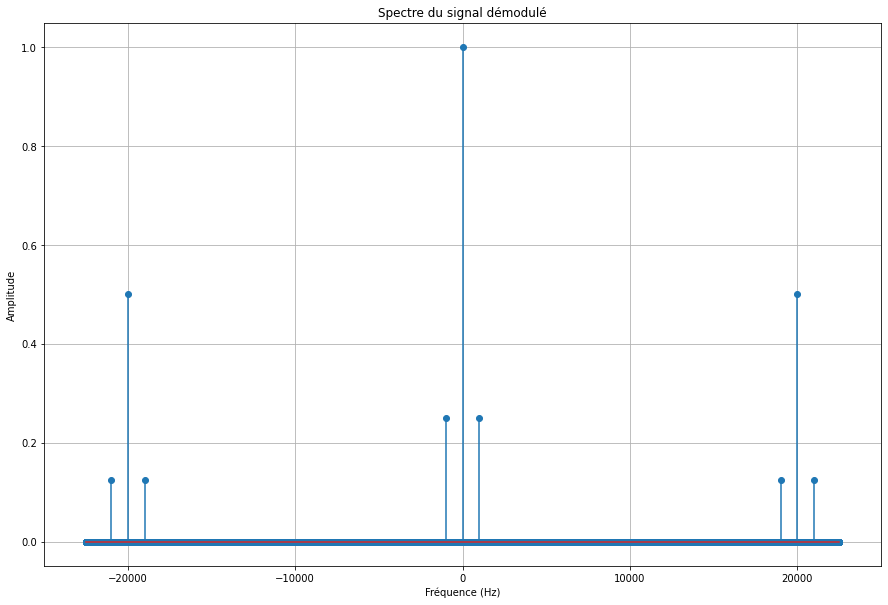

In [197]:
y1 = e * np.cos(2*np.pi*f0*t)
Y1 = np.fft.fft(y1)/N

plt.figure(figsize=(15, 10))
plt.title("Spectre du signal démodulé")
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Hz)")
plt.stem(f, np.abs(Y1))
plt.xlim(-25000, 25000)
plt.grid()
plt.show()

<h4> Analyse </h4>

Si on compare le spectre aux résultats attendus, on a bien un pic de Dirac a la fréquence nulle d'amplite 1 (car k=2 et 2/2 = 1).<br><br>
Nous avons bien 4 pics d'amplitude $\frac{1}{8}$ qui se trouve autour des pics obtenus par $\cos^2(2\pi f_0 t)$ d'amplitude $\frac{1}{2}$ (car k=2). <br><br>
Nous avons également toujours nos pics aux fréquences $f_1 = 1 \, \text{K}Hz$ et $-f_1$ d'amplitude $\frac{1}{4}$.

<h4> Pour supprimer les grandes fréquences et garder uniquement les pics de fréquences correspondants aux signal émis initialement, on applique un filtre passe-bas du premier ordre. </h4>

<h3> Exercice 2 : Question 2) </h3>

<h4> Partie Analytique </h4>

Pour calculer la valeur de la résistance $R$ d'un filtre RC passe-bas connaissant la fréquence de coupure $f_c$ et la valeur de la capacité $C$, nous utilisons la formule suivante :

$$R = \frac{1}{2 \pi f_c C}$$

Nous prenons une fréquence de coupure $f_c$ de 1200 Hz et la capacité $C$ est de 15 nF.

Substituons ces valeurs dans la formule pour calculer \$R$ :

$$\boxed{R \approx 8,85 \, \text{k}\Omega}$$

Donc, la valeur de la résistance $R$ nécessaire pour le filtre RC passe-bas avec une fréquence de coupure de 1200 Hz et une capacité de 15 nF est d'environ 8,85 $\text{k}\Omega$.

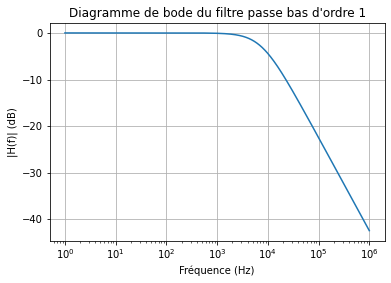

In [205]:
fc = 1200
C = 15e-9
R = 1/(2*np.pi*fc*C)

f_filtre = np.logspace(0, 6, 45000) #echelle logarithmique

H = 1 / (1 + 1j*R*C*f_filtre)

plt.title("Diagramme de bode du filtre passe bas d'ordre 1")
plt.semilogx(f_filtre, 20*np.log10(abs(H) + 1e-10))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()
plt.show()

<h4> Partie Python </h4>

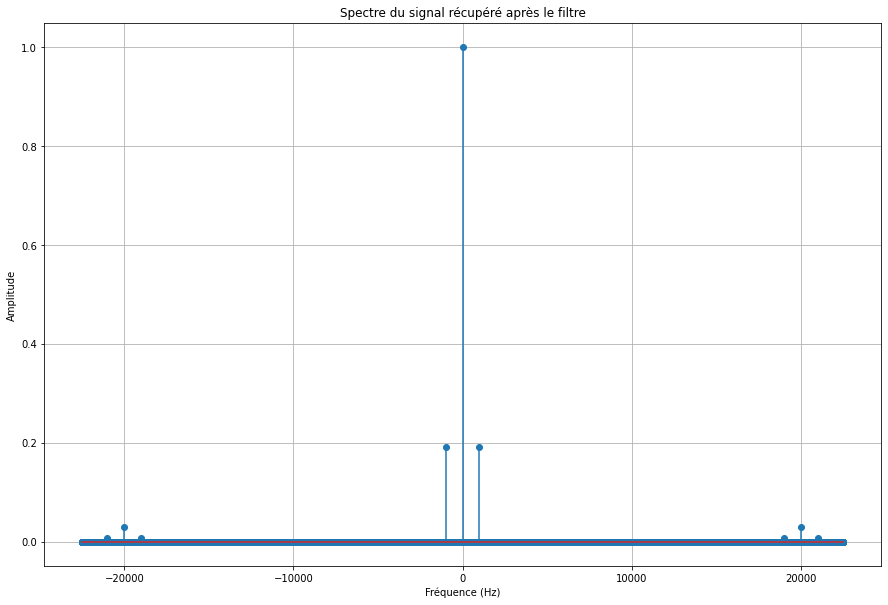

In [213]:
fc = 1200
C = 15e-9
R = 1/(2*np.pi*fc*C)

Y = Y1 * 1/(1 + 1j*f*R*C*2*np.pi) #application du filtre

plt.figure(figsize=(15, 10))
plt.title("Spectre du signal récupéré après le filtre")
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Hz)")
plt.stem(f, np.abs(Y))
plt.grid()
plt.show()

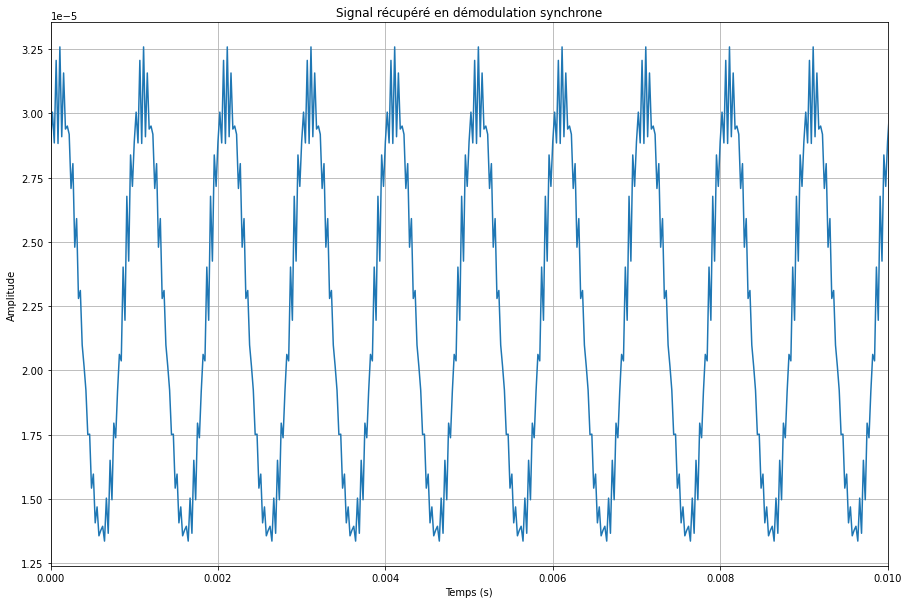

In [224]:
Z = np.fft.ifft(Y)

plt.figure(figsize=(15, 10))
plt.title("Signal récupéré en démodulation synchrone")
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.plot(t, abs(Z))
plt.xlim(0, 0.01)
plt.grid()
plt.show()

<h3> Exercice 3 : Question 1) </h3>

<h4> Partie Analytique </h4>

1. Schéma de démodulation asynchrone :
   Dans le schéma de démodulation asynchrone, le signal modulé est multiplié par un signal porteuse déphasé. Mathématiquement, cela peut être représenté comme suit :
   
   $y(t) = x(t) \cdot \cos(\omega_c t + \phi)$ \)
   
   où $y(t)$ est le signal modulé, $x(t)$ est le signal modulant, $\omega_c$ est la fréquence de la porteuse, et $\phi$ est le déphasage entre le signal modulé et la porteuse.
   
   En utilisant la décomposition en série de Fourier, nous pouvons écrire le signal modulé $y(t)$ comme une somme de composantes sinusoïdales de différentes fréquences :
   
   $y(t) = \sum_{n=-\infty}^{\infty} Y_n \cdot \cos(n\omega_c t + \phi_n)$
   
   où $Y_n$ est l'amplitude de la n-ième composante sinusoïdale et $\phi_n$ est le déphasage correspondant.
   
   Pour effectuer la démodulation, nous utilisons un filtre passe-bas pour éliminer les composantes haute fréquence du signal. En conséquence, seules les composantes à basse fréquence (correspondant au signal modulant) sont conservées.
   
2. Schéma de démodulation synchrone :
   Dans le schéma de démodulation synchrone, le signal modulé est multiplié par une porteuse synchronisée en phase et en fréquence avec la porteuse d'origine. Mathématiquement, cela peut être représenté comme suit :
   
   $z(t) = x(t) \cdot \cos(\omega_c t)$
   
   où $z(t)$ est le signal modulé, $x(t)$ est le signal modulant, et $\omega_c$ est la fréquence de la porteuse.
   
   En utilisant la décomposition en série de Fourier, nous pouvons écrire le signal modulé $z(t)$ comme une somme de composantes sinusoïdales de différentes fréquences :
   
   $z(t) = \sum_{n=-\infty}^{\infty} Z_n \cdot \cos(n\omega_c t)$
   
   où $Z_n$ est l'amplitude de la n-ième composante sinusoïdale.
   
   Lorsque nous utilisons un filtre passe-bas pour la démodulation, les composantes haute fréquence sont supprimées, ne laissant que les composantes à basse fréquence (correspondant au signal modulant).
   
   Comparaison des résultats :
   En analysant les deux schémas de démodulation, nous constatons que les deux techniques utilisent une multiplication avec une porteuse pour extraire le signal modulant. Bien que les déphasages et les fréquences puissent varier, la décomposition en série de Fourier montre que les deux schémas aboutissent finalement à la même représentation du signal modulant

<h4> Partie Python </h4>

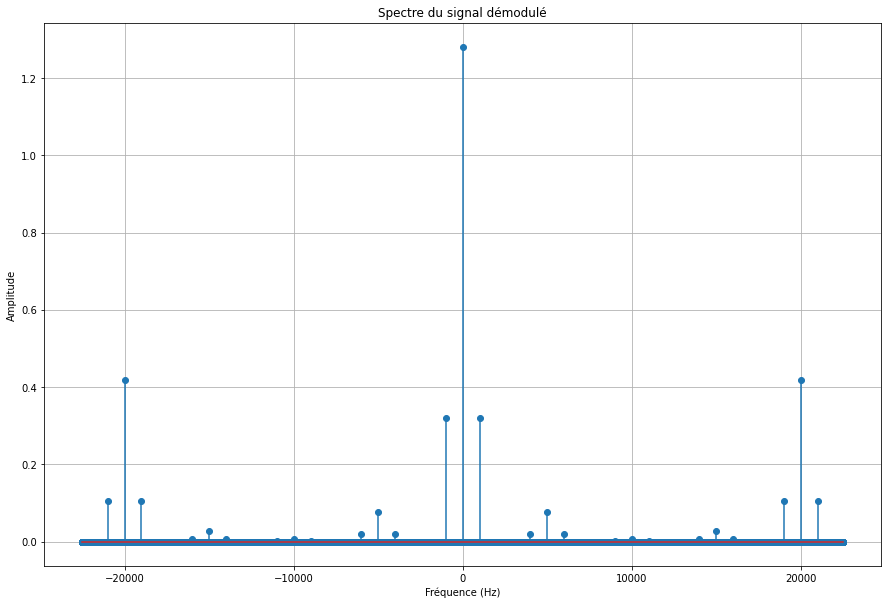

In [209]:
y2 = abs(e)
Y2 = np.fft.fft(y2)/N

plt.figure(figsize=(15, 10))
plt.title("Spectre du signal démodulé")
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Hz)")
plt.stem(f, np.abs(Y2))
plt.grid()
plt.show()

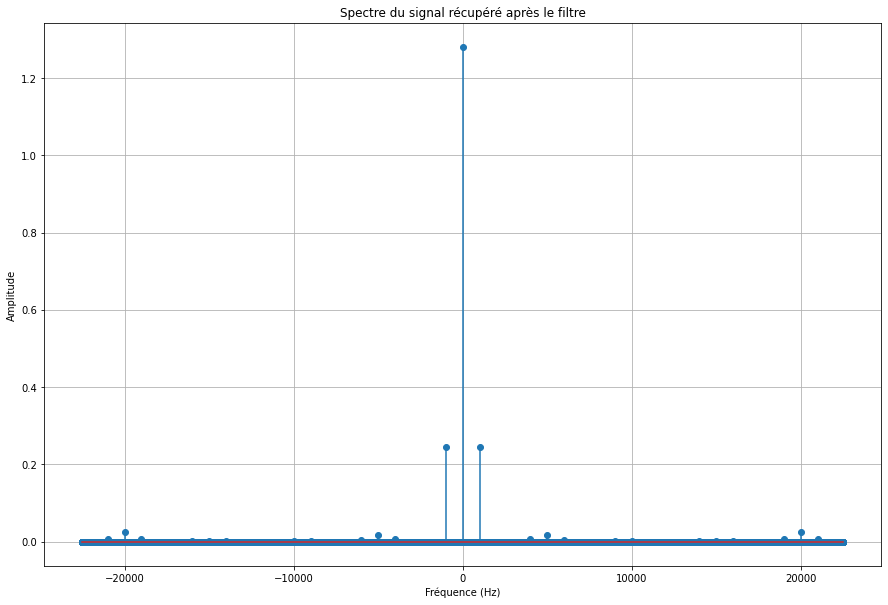

In [210]:
fc = 1200
C = 15e-9
R = 1/(2*np.pi*fc*C)

Y3 = Y2 * 1/(1 + 1j*f*2*np.pi*R*C) #application du filtre

plt.figure(figsize=(15, 10))
plt.title("Spectre du signal récupéré après le filtre")
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Hz)")
plt.stem(f, np.abs(Y3))
plt.grid()
plt.show()

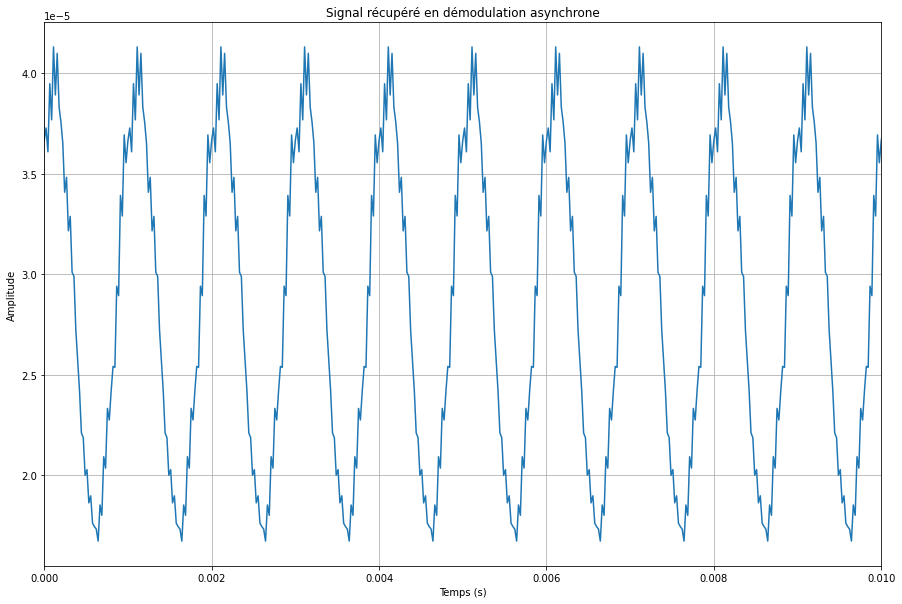

In [211]:
Z2 = np.fft.ifft(Y3)

plt.figure(figsize=(15, 10))
plt.title("Signal récupéré en démodulation asynchrone")
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.plot(t, abs(Z2))
plt.xlim(0, 0.01)
plt.grid()
plt.show()

<h2> Conclusion </h2>

L'on remarque que les deux méthodes permettent de récupérer le signal émis à l'origine. Nous devons cependant ajouter un amplificateur/multiplieur pour pouvoir retrouver le signal avec une amplitude correcte. <br><br> L'on remarque que les deux méthodes de démodulation fournissent un signal avec un léger bruit.

Le signal est également récupéré avec un léger déphasage $\Phi$ quelque soit la méthode.

Il faut également rédifinir l'origine des signaux à 0.

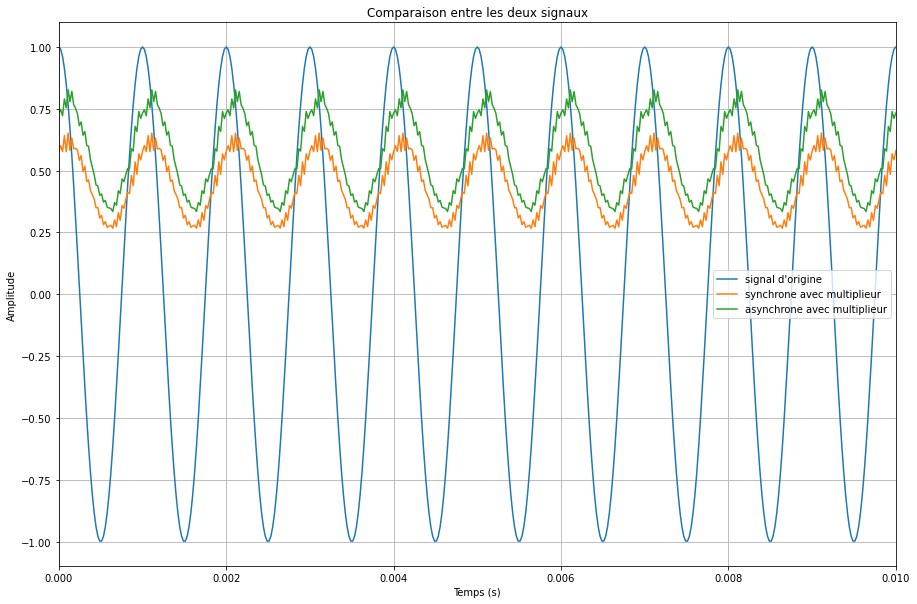

In [239]:
plt.figure(figsize=(15, 10))
plt.title("Comparaison entre les deux signaux")
plt.ylabel("Amplitude")
plt.xlabel("Temps (s)")
plt.plot(t, x, label="signal d'origine")
plt.plot(t, abs(Z*20000), label="synchrone avec multiplieur")
plt.plot(t, abs(Z2*20000), label="asynchrone avec multiplieur")
plt.xlim(0, 0.01)
plt.legend()
plt.grid()
plt.show()